In [140]:
# import set up - JT
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [141]:
# CSV set up
output_data_file = "Resources/student-merge.csv"
por_path = "Resources/student-por.csv"
math_path = "Resources/student-mat.csv"

por_df = pd.read_csv(por_path)
math_df = pd.read_csv(math_path)

In [142]:
# CSV file data clean and output
students_df = pd.merge(por_df, math_df, on=["school","sex","age","address","famsize",
                                            "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                                            "guardian", "traveltime","nursery","higher",
                                            "internet","romantic","famrel","freetime",
                                            "goout","Dalc","Walc","health"])
students_df.columns = students_df.columns.str.replace("_x","_por")
students_df.columns = students_df.columns.str.replace("_y","_math")
students_df.to_csv(output_data_file)
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,absences_math,G1_math,G2_math,G3_math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2,0,yes,no,no,no,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,0,no,yes,no,no,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,yes,no,yes,no,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,0,no,yes,yes,yes,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,0,no,yes,yes,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,...,3,1,no,no,no,yes,0,7,5,0
366,MS,F,18,U,LE3,T,3,1,teacher,services,...,2,0,no,yes,yes,no,0,7,9,8
367,MS,F,18,U,GT3,T,1,1,other,other,...,2,1,no,no,no,yes,0,6,5,0
368,MS,M,17,U,LE3,T,3,1,services,services,...,1,0,no,no,no,no,3,14,16,16


In [143]:
students_df.count()
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           370 non-null    object
 1   sex              370 non-null    object
 2   age              370 non-null    int64 
 3   address          370 non-null    object
 4   famsize          370 non-null    object
 5   Pstatus          370 non-null    object
 6   Medu             370 non-null    int64 
 7   Fedu             370 non-null    int64 
 8   Mjob             370 non-null    object
 9   Fjob             370 non-null    object
 10  reason           370 non-null    object
 11  guardian         370 non-null    object
 12  traveltime       370 non-null    int64 
 13  studytime_por    370 non-null    int64 
 14  failures_por     370 non-null    int64 
 15  schoolsup_por    370 non-null    object
 16  famsup_por       370 non-null    object
 17  paid_por         370 non-null    ob

In [144]:
# Determin Students' Study Behaviour and Grades Suammry Table
# Assume Student Study is affected by 'Weekly Study Time','Past Class Failures','Extra Educational Support','Family Educational Support','Extra Paid Classes'and 'Go out time'

studytime_por=students_df['studytime_por']
failures_por=students_df['failures_por']
schoolsup_por=students_df['schoolsup_por']
famsup_por=students_df['famsup_por'] 
paid_por=students_df['paid_por']
activities_por=students_df['activities_por']        
absences_por=students_df['absences_por']          
G3_por=students_df['G3_por']
goout=students_df['goout']         
studytime_math=students_df['studytime_math']
failures_math=students_df['failures_math'] 
schoolsup_math=students_df['schoolsup_math']
famsup_math=students_df['famsup_math'] 
paid_math=students_df['paid_math']
activities_math=students_df['activities_math']     
absences_math=students_df['absences_math']             
G3_math=students_df['G3_math']

Summary_behaviour = pd.DataFrame({'weekly study time of portuguese language':studytime_por,
                                  'number of past portuguese class failures':failures_por, 
                                  'extra educational support for portuguese':schoolsup_por,
                                  'family educational support for portuguese':famsup_por,
                                  'extra paid classes within the course subject for portuguese':paid_por,
                                  'extra-curricular activities for portuguese':activities_por,        
                                  'number of school absences for portuguese':absences_por,              
                                  'final period grade for portuguese':G3_por,
                                  'going out with friend after School':goout,         
                                  'weekly study time of math':studytime_math,
                                  'number of past math class failures':failures_math, 
                                  'extra educational support for math':schoolsup_math,
                                  'family educational support for math':famsup_math,
                                  'extra paid classes within the course subject for math':paid_math,
                                  'extra-curricular activities for math':activities_math,     
                                  'number of school absences for math':absences_math,            
                                  'final period grade for math':G3_math})
Summary_behaviour

,weekly study time of portuguese language,number of past portuguese class failures,extra educational support for portuguese,family educational support for portuguese,extra paid classes within the course subject for portuguese,extra-curricular activities for portuguese,number of school absences for portuguese,final period grade for portuguese,going out with friend after School,weekly study time of math,number of past math class failures,extra educational support for math,family educational support for math,extra paid classes within the course subject for math,extra-curricular activities for math,number of school absences for math,final period grade for math
0,2,0,yes,no,no,no,4,11,4,2,0,yes,no,no,no,6,6
1,2,0,no,yes,no,no,2,11,3,2,0,no,yes,no,no,4,6
2,2,0,yes,no,no,no,6,12,2,2,3,yes,no,yes,no,10,10
3,3,0,no,yes,no,yes,0,14,2,3,0,no,yes,yes,yes,2,15
4,2,0,no,yes,no,no,0,13,2,2,0,no,yes,yes,no,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,3,1,no,no,no,yes,4,10,2,3,1,no,no,no,yes,0,0
366,2,0,no,yes,no,no,4,16,4,2,0,no,yes,yes,no,0,8
367,2,0,no,no,no,yes,6,9,1,2,1,no,no,no,yes,0,0
368,1,0,no,no,no,no,6,10,5,1,0,no,no,no,no,3,16


In [145]:
# Weekly Study Time Vs Portuguese Final Grades
studyhours_por = [1, 2, 3, 4]
# Create empty list to fill with G3 Grades
Por_data = []

for studys in studyhours_por:
# Locate the rows which contain weekly study time on portugues and get the final Grade
    Study_por = Summary_behaviour.loc[Summary_behaviour['weekly study time of portuguese language'] == studys,'final period grade for portuguese']

    # add subset
    Por_data.append(Study_por)

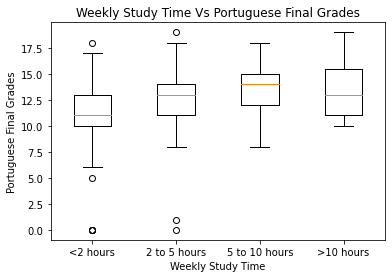

In [146]:
fig1,ax1 = plt.subplots()
ax1 .boxplot(Por_data, labels=studyhours_por)
ax1 .set_title('Weekly Study Time Vs Portuguese Final Grades')
ax1.set_ylabel('Portuguese Final Grades')
ax1.set_xlabel('Weekly Study Time')
plt.xticks([1,2,3,4],['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])
plt.show()

In [147]:
# Weekly Study Time Vs Math Final Grades
studyhours_math = [1, 2, 3, 4]
# Create empty list to fill with G3 Grades
math_data = []

for study in studyhours_math:
# Locate the rows which contain weekly study time on math and get the final Grade
    Study_math = Summary_behaviour.loc[Summary_behaviour['weekly study time of math'] == study,'final period grade for math']

    # add subset
    math_data.append(Study_math)

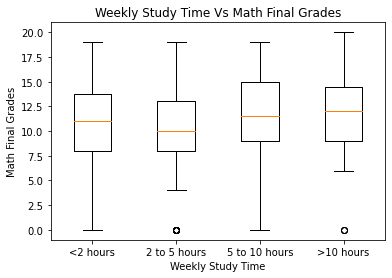

In [148]:
fig1,ax1 = plt.subplots()
ax1 .boxplot(math_data, labels=studyhours_math)
ax1 .set_title('Weekly Study Time Vs Math Final Grades')
ax1.set_ylabel('Math Final Grades')
ax1.set_xlabel('Weekly Study Time')
plt.xticks([1,2,3,4],['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])
plt.show()

y = -0.07x + 12.82


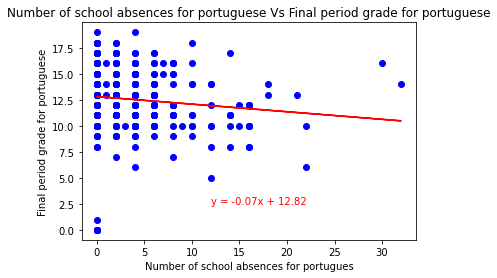

In [149]:
# Identify the relationship of Student Absences for Portuguese and Final Portuguese Grade
x_values = Summary_behaviour['number of school absences for portuguese']
y_values = Summary_behaviour['final period grade for portuguese']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values, color='b')
plt.plot(x_values,regress_values,'r-')
plt.title('Number of school absences for portuguese Vs Final period grade for portuguese')
plt.xlabel('Number of school absences for portugues')
plt.ylabel('Final period grade for portuguese')
plt.annotate(line_eq, (12,2.5),color='r')

plt.show()

y = 0.01x + 10.4


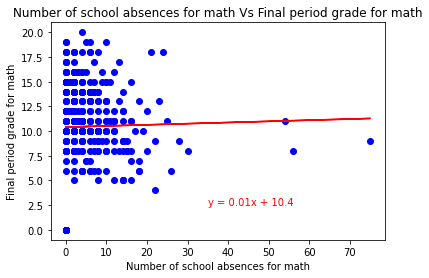

In [150]:
# Identify the relationship of Student Absences for Math and Final Math Grade
x_values = Summary_behaviour['number of school absences for math']
y_values = Summary_behaviour['final period grade for math']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values, color='b')
plt.plot(x_values,regress_values,'r-')
plt.title('Number of school absences for math Vs Final period grade for math')
plt.xlabel('Number of school absences for math')
plt.ylabel('Final period grade for math')
plt.annotate(line_eq,(35,2.5),color='r')

plt.show()

In [151]:
# Measure other facts inpact for Portuguese Final Grade
Edu_suport_por=Summary_behaviour.groupby(['extra educational support for portuguese'])
Family_suport_por=Summary_behaviour.groupby(['family educational support for portuguese'])
Paid_class_por=Summary_behaviour.groupby(['extra paid classes within the course subject for portuguese'])
Extra_curi_por=Summary_behaviour.groupby(['extra-curricular activities for portuguese'])
Edu_suport_math=Summary_behaviour.groupby(['extra educational support for math'])
Family_suport_math=Summary_behaviour.groupby(['family educational support for math'])
Paid_class_math=Summary_behaviour.groupby(['extra paid classes within the course subject for math'])
Extra_curi_math=Summary_behaviour.groupby(['extra-curricular activities for math'])

average_Edu_por = Edu_suport_por['final period grade for portuguese'].mean()
average_family_por = Family_suport_por['final period grade for portuguese'].mean()
average_paid_por = Paid_class_por['final period grade for portuguese'].mean()
average_extra_por = Extra_curi_por['final period grade for portuguese'].mean()
average_Edu_math = Edu_suport_math['final period grade for math'].mean()
average_family_math = Family_suport_math['final period grade for math'].mean()
average_paid_math = Paid_class_math['final period grade for math'].mean()
average_extra_math = Extra_curi_math['final period grade for math'].mean()

Summary_average = pd.DataFrame({'extra educational support for portugues average final Grade':average_Edu_por,
                                'family educational support for portuguese average final Grade':average_family_por,
                                'extra paid classes within the course subject for portuguese average final Grade':average_paid_por,
                                'extra-curricular activities for portuguese average final Grade':average_extra_por,
                                'extra educational support for math average final Grade':average_Edu_math,
                                'family educational support for math average final Grade':average_family_math,
                                'extra paid classes within the course subject for math average final Grade':average_paid_math,
                                'extra-curricular activities for math average final Grade':average_extra_math,
                                })
Summary_average

,extra educational support for portugues average final Grade,family educational support for portuguese average final Grade,extra paid classes within the course subject for portuguese average final Grade,extra-curricular activities for portuguese average final Grade,extra educational support for math average final Grade,family educational support for math average final Grade,extra paid classes within the course subject for math average final Grade,extra-curricular activities for math average final Grade
no,12.716511,12.194245,12.66087,12.206704,10.616822,10.762590,10.071429,10.296089
yes,11.489796,12.770563,11.08000,12.879581,9.469388,10.285714,10.908046,10.623037


y = 0.12x + 12.06


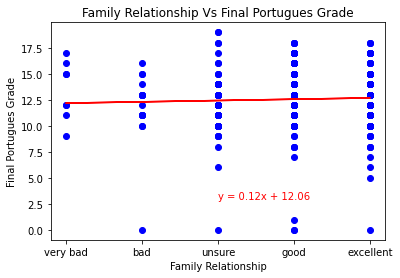

In [152]:
# Start Analysis Relationship between Students' family socio-economic status and Grades
# Identify the family relationship with Final grade for portuguese
x_values = students_df['famrel']
y_values = students_df['G3_por']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values, color='b')
plt.plot(x_values,regress_values,'r-')
plt.title('Family Relationship Vs Final Portugues Grade')
plt.xlabel('Family Relationship')
plt.xticks([1,2,3,4,5],['very bad', 'bad', 'unsure', 'good','excellent'])
plt.ylabel('Final Portugues Grade')
plt.annotate(line_eq, (3,3),color='r')

plt.show()


y = 0.23x + 9.58


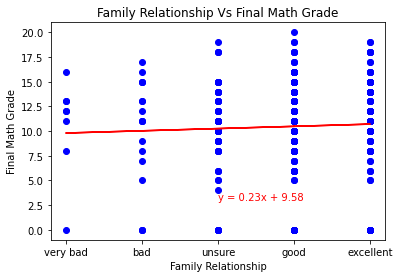

In [153]:
# Identify the family relationship with Final grade for math
x_values = students_df['famrel']
y_values = students_df['G3_math']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values, color='b')
plt.plot(x_values,regress_values,'r-')
plt.title('Family Relationship Vs Final Math Grade')
plt.xlabel('Family Relationship')
plt.xticks([1,2,3,4,5],['very bad', 'bad', 'unsure', 'good','excellent'])
plt.ylabel('Final Math Grade')
plt.annotate(line_eq, (3,3),color='r')

plt.show()

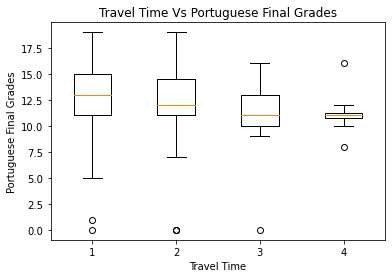

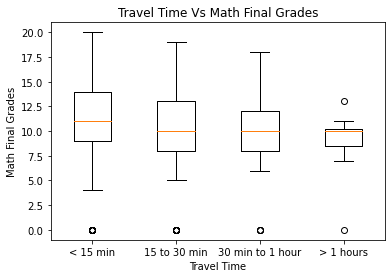

In [154]:
# Travel Time Vs portuguese Final Grades
Travel = [1, 2, 3, 4]
# Create empty list to fill with G3 Grades
travelpor_data = []
travelmath_data= []

for travels in Travel:
# Locate the rows which contain weekly study time on portugues and get the final Grade
    tra_por = students_df.loc[students_df['traveltime'] == travels,'G3_por']

    # add subset
    travelpor_data.append(tra_por)

for travels in Travel:
# Locate the rows which contain weekly study time on portugues and get the final Grade
    tra_math = students_df.loc[students_df['traveltime'] == travels,'G3_math']

    # add subset
    travelmath_data.append(tra_math)

fig1,ax1 = plt.subplots()
ax1 .boxplot(travelpor_data, labels=Travel)
ax1 .set_title('Travel Time Vs Portuguese Final Grades')
ax1.set_ylabel('Portuguese Final Grades')
ax1.set_xlabel('Travel Time')

fig2,ax2 = plt.subplots()
ax2 .boxplot(travelmath_data, labels=Travel)
ax2 .set_title('Travel Time Vs Math Final Grades')
ax2.set_ylabel('Math Final Grades')
ax2.set_xlabel('Travel Time')


plt.xticks([1,2,3,4],['< 15 min', '15 to 30 min', '30 min to 1 hour', '> 1 hours'])
plt.show()



<AxesSubplot:>

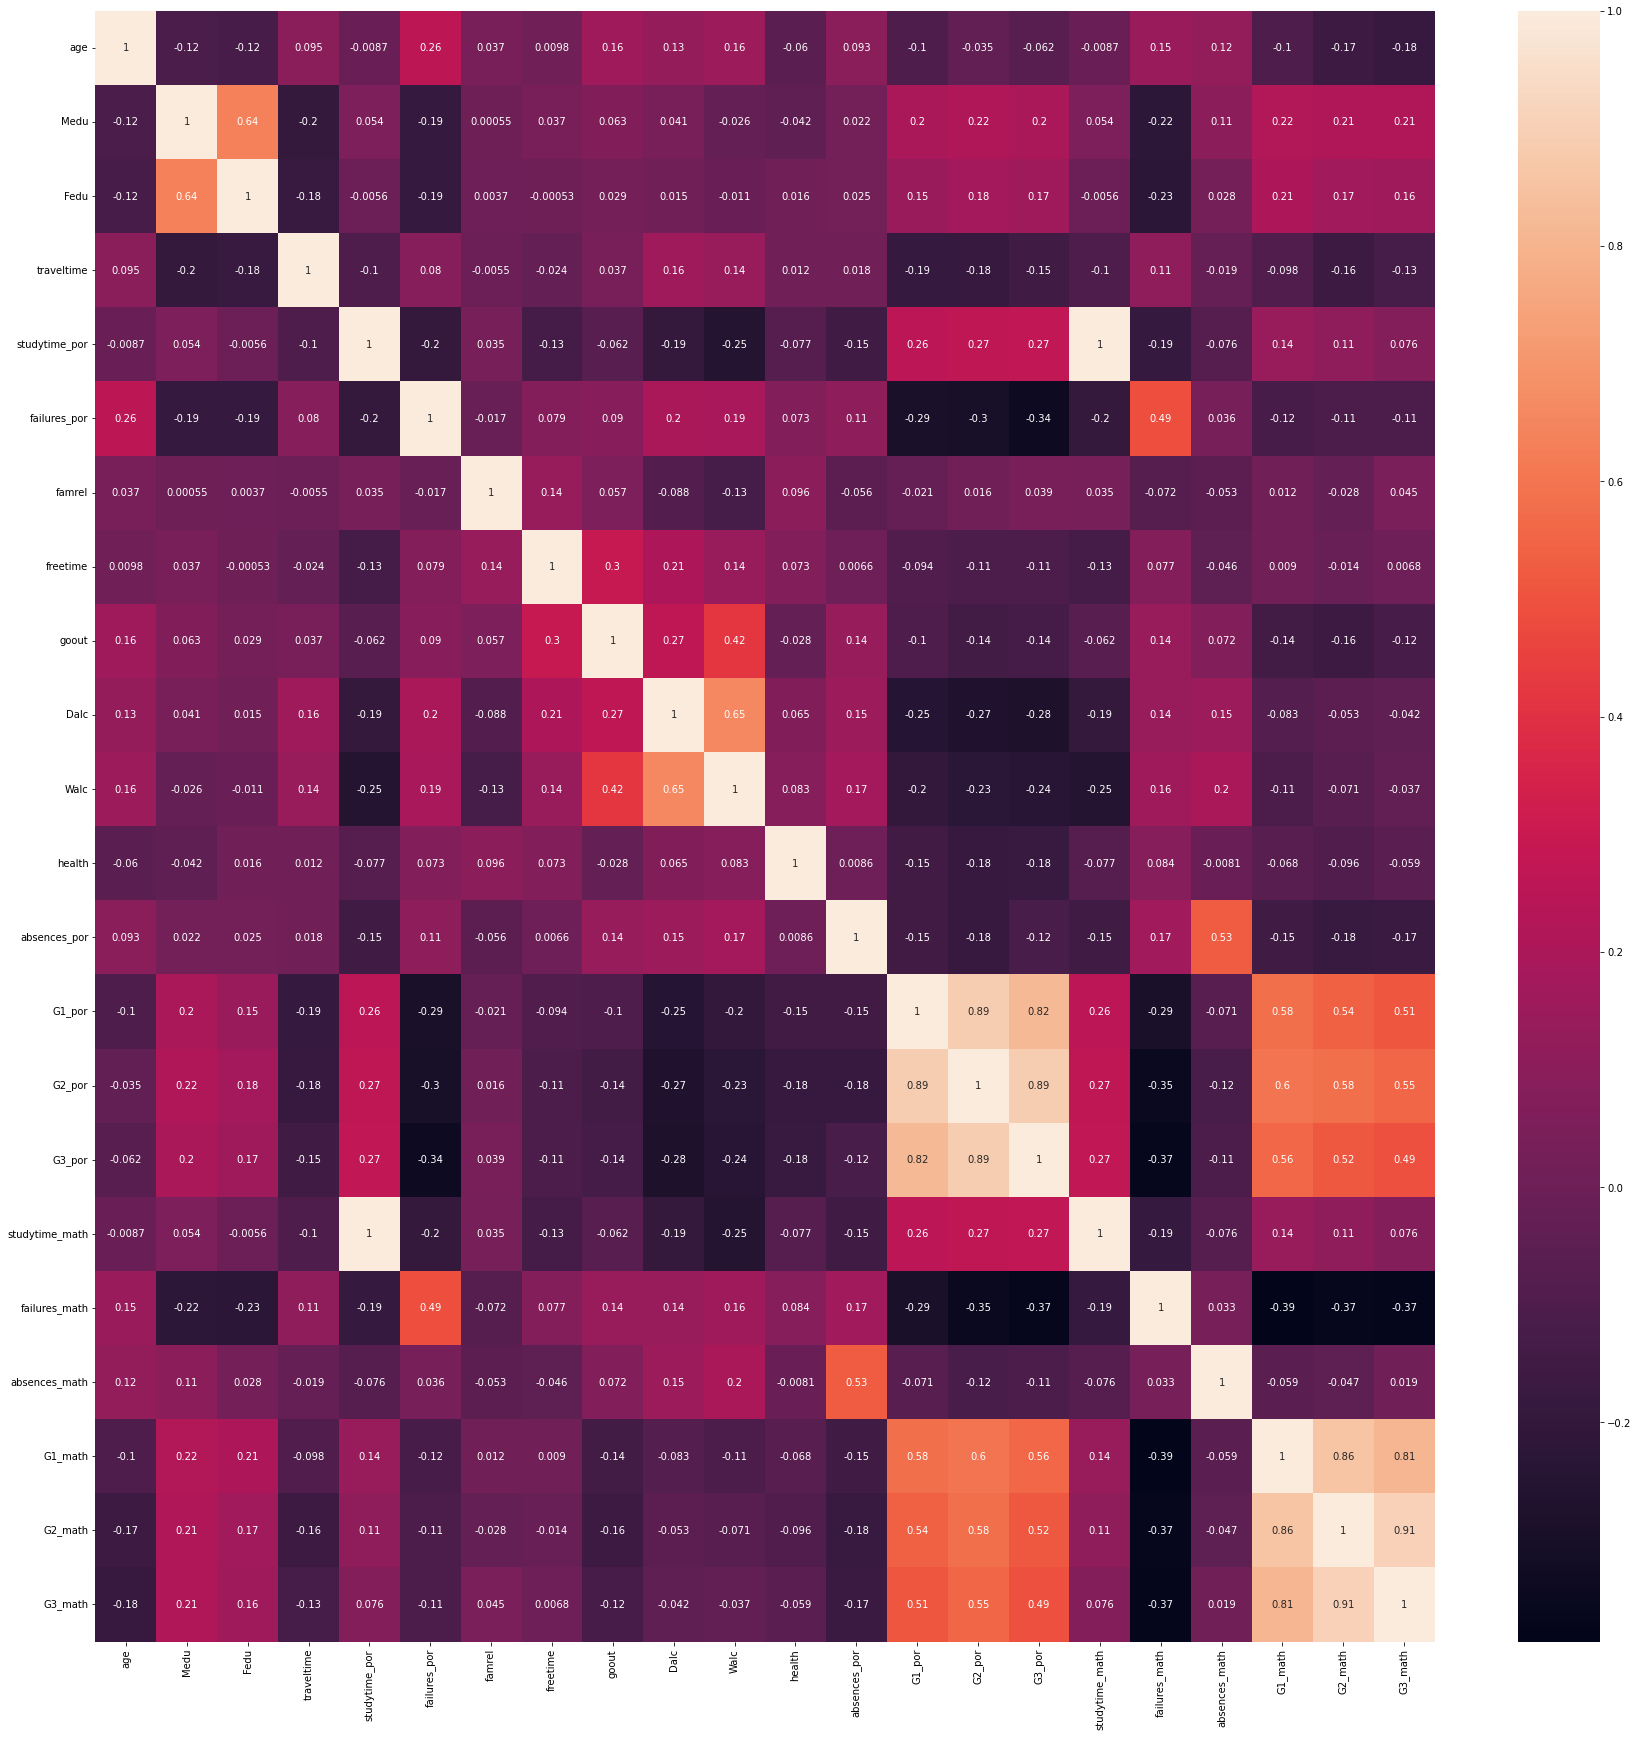

In [156]:


plt.figure(figsize=(30,30))
sns.heatmap(students_df.corr(), annot=True)